In [ ]:
!pip install --force-reinstall -v "tensorflow==2.15.1" -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6

In [ ]:
!pip install easyocr -q
!pip install pytesseract -q
!apt-get install tesseract-ocr -q
!pip install keras-ocr -q

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import easyocr
import logging
from matplotlib.patches import Rectangle
import pytesseract
from pytesseract import Output
import keras_ocr
import cv2
import time
from difflib import SequenceMatcher
from matplotlib import pyplot as plt

In [ ]:
def calculate_accuracy(reference, extracted):
    """
    Calculates accuracy as the similarity ratio between reference and extracted text.
    """
    return SequenceMatcher(None, reference, extracted).ratio()

In [ ]:
def extract_text_with_tesseract(image_path):
    """
    Extracts text from an image using Tesseract OCR.
    """
    try:
        # Read the image
        image = cv2.imread(image_path)

        # Perform OCR using Tesseract
        start_time = time.time()
        extracted_text = pytesseract.image_to_string(image)
        end_time = time.time()

        time_taken = end_time - start_time
        return extracted_text, time_taken

    except Exception as e:
        return f"Error occurred: {str(e)}", 0



In [ ]:
def extract_text_with_easyocr(image_path, language='en'):
    """
    Extracts text from an image using EasyOCR.
    """
    try:
        # Suppress warnings from EasyOCR
        logging.getLogger('easyocr').setLevel(logging.ERROR)

        # Initialize the EasyOCR Reader
        reader = easyocr.Reader([language])

        # Perform OCR on the image
        start_time = time.time()
        results = reader.readtext(image_path)
        end_time = time.time()

        # Extract and combine detected text
        extracted_text = "\n".join([result[1] for result in results])
        time_taken = end_time - start_time

        return extracted_text, results, time_taken

    except Exception as e:
        return f"Error occurred: {str(e)}", None, 0


In [ ]:
def extract_text_with_kerasocr(image_path):
    """
    Extracts text from an image using Keras OCR.
    """
    try:
        # Suppress warnings from Keras OCR
        logging.getLogger('keras_ocr').setLevel(logging.ERROR)

        start_time = time.time()

        # Set up the pipeline
        pipeline = keras_ocr.pipeline.Pipeline()

        # Read and process the image
        images = [keras_ocr.tools.read(image_path)]
        predictions = pipeline.recognize(images)

        end_time = time.time()

        # Extract text from predictions
        extracted_text = "\n".join([text for text, _ in predictions[0]])
        time_taken = end_time - start_time

        return extracted_text, predictions , time_taken
    except Exception as e:
        return f"Error occurred: {str(e)}", None, 0



Original Image


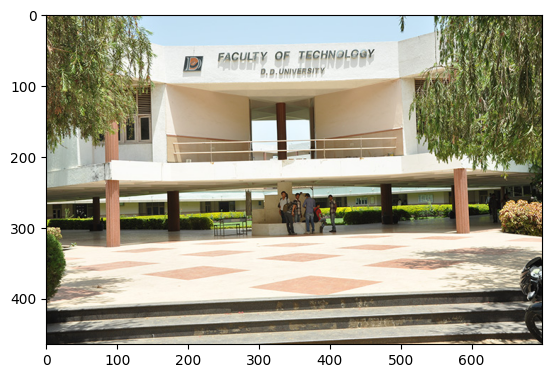

In [ ]:
# Path to the input image
image_path = "/content/drive/MyDrive/Task5/test_image/ddu.jpg"  # Replace with the actual image path

# Reference text for accuracy comparison (manually verified text from the image)
reference_text = """DHARMSINH DESAI UNIVERSITY"""

# Read and process the image
img = cv2.imread(image_path)

# Convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Original Image")
plt.imshow(img_rgb)
plt.show()


In [ ]:
# Extract text using Tesseract
print("Using Tesseract OCR...")
tesseract_text, tesseract_time = extract_text_with_tesseract(image_path)
print(f"Tesseract OCR Text:\n{tesseract_text}")
print(f"Time taken by Tesseract OCR: {tesseract_time:.2f} seconds")


Using Tesseract OCR...
Tesseract OCR Text:
 
      

GULTY OF TEGHN@L@eY
2,2, UNIVERSITY

Time taken by Tesseract OCR: 0.65 seconds


In [ ]:
# Extract text using EasyOCR
print("\nUsing EasyOCR...")
easyocr_text, easyocr_results, easyocr_time = extract_text_with_easyocr(image_path)
print(f"EasyOCR Text:\n{easyocr_text}")
print(f"Time taken by EasyOCR: {easyocr_time:.2f} seconds")



Using EasyOCR...
EasyOCR Text:
FACULTY
OF
TECHNOLOuY
university
Time taken by EasyOCR: 4.89 seconds


In [ ]:
# Extract text using KerasOCR
print("\nUsing KerasOCR...")
kerasocr_text, kerasocr_predictions, kerasocr_time = extract_text_with_kerasocr(image_path)
print(f"KerasOCR Text:\n{kerasocr_text}")
print(f"Time taken by KerasOCR: {kerasocr_time:.2f} seconds")


Using KerasOCR...
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 26s 26s/step


1/1 [==============================] - 3s 3s/step
KerasOCR Text:
technology
faculty
of
univesity
d
di
Time taken by KerasOCR: 48.70 seconds


In [ ]:
# Calculate accuracies
print("\nComparison:")
print(f"Tesseract OCR Accuracy: {calculate_accuracy(reference_text, tesseract_text):.2f}")
print(f"EasyOCR Accuracy: {calculate_accuracy(reference_text, easyocr_text):.2f}")
print(f"KerasOCR Accuracy: {calculate_accuracy(reference_text, kerasocr_text):.2f}")



Comparison:
Tesseract OCR Accuracy: 0.36
EasyOCR Accuracy: 0.14
KerasOCR Accuracy: 0.00



Visualizing KerasOCR...


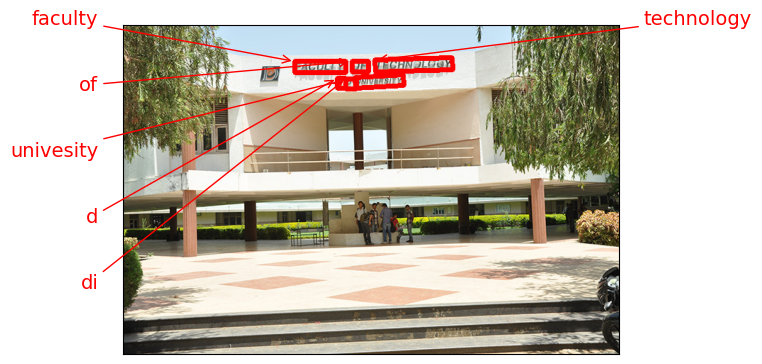

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Visualize the results with KerasOCR
print("\nVisualizing KerasOCR...")
keras_ocr.tools.drawAnnotations(image=keras_ocr.tools.read(image_path), predictions=kerasocr_predictions[0])

# Show KerasOCR visualized image
plt.figure(figsize=(10, 10))
plt.show()


Visualizing EasyOCR...


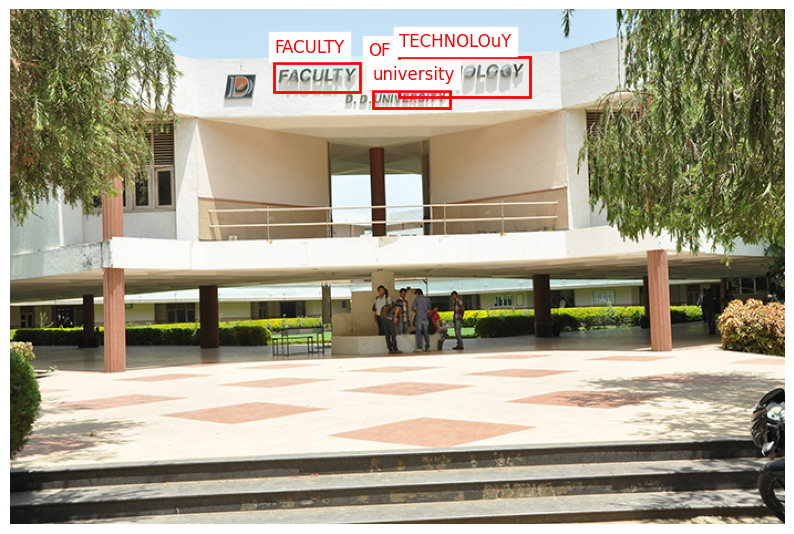

In [ ]:
# Visualize the results with EasyOCR
print("\nVisualizing EasyOCR...")
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
ax = plt.gca()

for bbox, text, prob in easyocr_results:
    # bbox contains the coordinates of the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    x_min = min(top_left[0], bottom_left[0])
    y_min = min(top_left[1], top_right[1])
    width = max(top_right[0], bottom_right[0]) - x_min
    height = max(bottom_left[1], bottom_right[1]) - y_min

    # Draw bounding box
    rect = Rectangle((x_min, y_min), width, height, edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    # Annotate with detected text
    plt.text(x_min, y_min - 10, text, color='red', fontsize=12, backgroundcolor='white')

plt.axis('off')
plt.show()
